# Class 12
## ML Models: Logistic Regression

Today we are going to move to learning with image data. We will focus on the classification problem: can we train a model to identify an image? We will start with a simple model that will lead us to one of the best image recognition models so far: deep learning neural networks.

### Classification Review

Recall from previous classes that the goal in a classification problem is to predict one of a finite number of output classes. We've used the "fast/slow" data several times before and we'll review the simplist classifier algorithm that we first saw in Class04: the perceptron.

As usual, we load the data, do our train/test split, then train the model. We then plot the test data and the decision boundary.

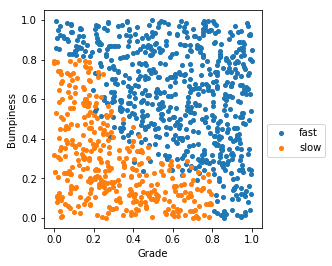

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Perceptron, LogisticRegression

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#Returning to Class04 data
speeddf = pd.read_csv("../Class04/Class04_speed_data.csv",dtype={'Speed':'category'})

#We'll use a different tool to plot the data now that we know how to group the data by a category. This will help us make better combined plots later on.
groups = speeddf.groupby('Speed')

# Plot the data
trainfig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
# The next step is to cycle through the groups (based on our categories) and plot each one on the same axis.
for name, group in groups:
    ax.plot(group['Grade'], group['Bumpiness'], marker='o', linestyle='', ms=4, label=name)
    ax.set_aspect(1)
ax.legend(bbox_to_anchor=(1.0,0.5))
ax.set_xlabel('Grade')
ax.set_ylabel('Bumpiness')

Accuracy Score: 0.9
Matthews Correlation Coefficient (MCC): 0.8148487556741162


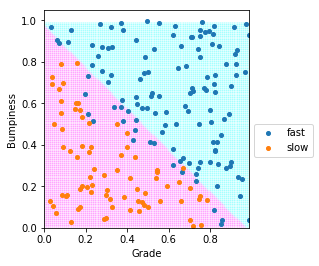

In [2]:
# Split the data into training and testing sets and prepare the features and labels
train, test = train_test_split(speeddf, test_size=0.2, random_state=23)

features_train = train[['Grade','Bumpiness']].values
labels_train = train['Speed'].values

features_test = test[['Grade','Bumpiness']].values
labels_test = test['Speed'].values

class_labels = ["slow", "fast"]

# Load the model, fit the data, get the predicted values (for scoring)
model = Perceptron()
model.fit(features_train,labels_train)
y_pred = model.predict(features_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
x_min = 0.0; x_max = 1.0 # Mesh x size
y_min = 0.0; y_max = 1.0  # Mesh y size
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the boundary
Z = pd.Series(model.predict(np.c_[xx.ravel(), yy.ravel()]), dtype='category').cat.codes.values.reshape(xx.shape)

# First plot our points
testfig1, ax = plt.subplots()
plt.pcolormesh(xx, yy, Z, cmap= plt.cm.cool, alpha=0.1,axes=ax)
ax.set_aspect(1)

# Plot test points
groups = test.groupby('Speed')
# The next step is to cycle through the groups (based on our categories) and plot each one on the same axis.
for name, group in groups:
    ax.plot(group['Grade'], group['Bumpiness'], marker='o', linestyle='', ms=4, label=name)
ax.legend(bbox_to_anchor=(1.0,0.5))
ax.set_xlabel('Grade')
ax.set_ylabel('Bumpiness')

acc_score = metrics.accuracy_score(labels_test, y_pred)
matt_score = metrics.matthews_corrcoef(labels_test, y_pred)
print("Accuracy Score: {}".format(acc_score))
print("Matthews Correlation Coefficient (MCC): {}".format(matt_score))

As we saw before, the perceptron is simple, fast, and not very accurate. It gives us a straight line and a binary output: is the value fast or slow? There are many times when we want more information than this: we would like to know with what probability the model predicts the object to be fast or slow? What if we could slightly blur the line between the "slow" category and the "fast" category so that we make a smooth transition from a 0% chance of being fast to a 100% chance of being fast. Our next model does exactly that.

### Logistic Regression

This model will create a "soft" boundary between the different classes, giving us a smooth transition. This will be very important as we move towards neural networks: we need a smooth probability function to make them work. We'll use the same dataset and look at the logistic regression predictions.

Accuracy Score: 0.935
Matthews Correlation Coefficient (MCC): 0.8620192068216507


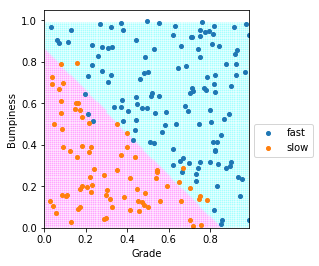

In [3]:
# Load the model and fit the data
LRmodel = LogisticRegression(C=1e5)
LRmodel.fit(features_train,labels_train)

y_pred = LRmodel.predict(features_test)

# Predict the boundary
Z = pd.Series(LRmodel.predict(np.c_[xx.ravel(), yy.ravel()]), dtype='category').cat.codes.values.reshape(xx.shape)

# First plot our points
testfig1, ax = plt.subplots()

plt.pcolormesh(xx, yy, Z, cmap= plt.cm.cool, alpha=0.1,axes=ax)
ax.set_aspect(1)

# Plot test points
groups = test.groupby('Speed')
# The next step is to cycle through the groups (based on our categories) and plot each one on the same axis.
for name, group in groups:
    ax.plot(group['Grade'], group['Bumpiness'], marker='o', linestyle='', ms=4, label=name)
ax.legend(bbox_to_anchor=(1.0,0.5))
ax.set_xlabel('Grade')
ax.set_ylabel('Bumpiness')

acc_score = metrics.accuracy_score(labels_test, y_pred)
matt_score = metrics.matthews_corrcoef(labels_test, y_pred)
print("Accuracy Score: {}".format(acc_score))
print("Matthews Correlation Coefficient (MCC): {}".format(matt_score))

We see that the model only did slightly better at predicting the output classes compared to the perceptron. But the real gain is in the probability distribution. We can look at that specifically to see how it is now a smooth transition.

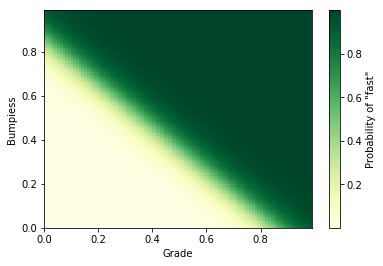

In [4]:
Z = pd.Series(LRmodel.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]).values.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap= plt.cm.YlGn)
cbr = plt.colorbar()
cbr.set_label('Probability of "fast"')
plt.xlabel('Grade')
plt.ylabel('Bumpiess')


We see that there are large regions where the probabilities are pretty flat, but right near the decision boundary there is a smooth transition up from $0$ to $1$. This is just what we want.

### Image Class Prediction

Even though our model isn't very sophisticated, we can still use it to train a model to predict the class for a set of images. We'll use the MNIST data that we first saw way back in Class01. Here's a quick review of what the data look like.

Expected Digit: 3


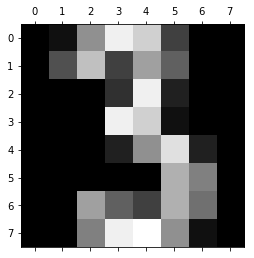

In [5]:
digitDF = pd.read_csv('../Class01/Class01_digits_data.csv')
testnum = 61

testimage = digitDF.loc[testnum][0:64].values.reshape((8,8))
print('Expected Digit: {0:d}'.format(digitDF['target'][testnum]))
plt.gray() 
plt.matshow(testimage) 

We'll now split the data in to train/test sections and train a logistic regression.

Accuracy Score: 0.9166666666666666


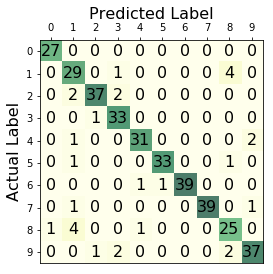

In [6]:
digittrain, digittest = train_test_split(digitDF, test_size=0.2, random_state=23)
features = digittrain.ix[:, digittrain.columns != 'target'].values
labels = digittrain['target'].values
class_names = range(10) # class labels are just 0-9

logreg = LogisticRegression(C=1e5)
logreg.fit(features,labels)

testinputs = digittest.ix[:, digittest.columns != 'target'].values
predictions = logreg.predict(testinputs)
actuals = digittest['target'].values

cnf_matrix = metrics.confusion_matrix(actuals, predictions)

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix,cmap=plt.cm.YlGn,alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)
        
show_confusion_matrix(cnf_matrix,class_labels=class_names)
score = metrics.accuracy_score(actuals, predictions)
print("Accuracy Score: {}".format(score))

So we have a model with an accuracy score of 0.92 and a confusion matrix that looks pretty good. Because we have access to the prediction probabilities, we can look at the logloss metric, too.

In [7]:
predict_prob = logreg.predict_proba(testinputs)
logloss = metrics.log_loss(actuals, predict_prob)
print("Log loss: {}".format(logloss))

Log loss: 0.8077865731388394


The logloss is decent, given that this is a simple model.

## Assignment

The assignment this week is to work on your project. I would like a draft version of your project turned in next week. We will spend some time in class next week doing a peer review of your work. This is a first draft, so I don't expect everything to be in its final form, but I do want you to fill in the basic outline of your project.